This is a iPython notebook to create a figure of the general number of peptides and proteins observed in the Biodiversity Library. This uses a generic parsing script that is in the same directory as the notebook. We start by importing the script, setting some class variables, and calling Main()


In [1]:
import IdentifyingPeptidesAndProteins
Parser = IdentifyingPeptidesAndProteins.ParserClass()
#parameters
DirectoryOfPSMs = "VanillaSearches.DataPackage1527"
FileToOrganismAssociation = "PSMFilesAssociatedByOrganism_new.txt"
Parser.AddFiles(DirectoryOfPSMs, FileToOrganismAssociation)
Parser.SetQvalue(0.0001)
Parser.Main()

I got this path PSMFilesAssociatedByOrganism_new.txt
Associating 205 files from 44 organisms


Now we do some building and get a look at how many proteins were found for each organism.

In [2]:
ProteinsPerOrganism = {}
Dictionary = Parser.GetOrganismObjects()
SortedOrgList = sorted(Dictionary.keys())
SortedProteinCountList = []
for OrganismName in SortedOrgList:
    NumProteins = Dictionary[OrganismName].GetProteinCount()
    print ("%s, %s"%(OrganismName, NumProteins))
    ProteinsPerOrganism[OrganismName] = NumProteins
    SortedProteinCountList.append(NumProteins)

Acidiphilium cryptum JF-5, 1102
Alcaligenes faecalis, 1498
Algoriphagus HL-49, 1920
Anaerococcus hydrogenalis DSM 7454, 1177
Bacillus cereus ATCC14579, 2315
Bacillus subtilis 168, 1800
Bacillus subtilis NCIB3610, 2317
Bacteroides fraglilis 638R, 1895
Bacteroides thetaiotaomicron VPI15482, 2331
Bifidobacterium (longum) infantis, 1087
Bifidobacterium bifidum, 949
Campylobacter jejuni F38011, 1398
Cellulomonas gilvus ATCC 13127, 2137
Cellulophaga baltica 18, 2308
Chryseobacterium indologenes, 1334
Citrobacter freundii UCI31, 2423
Clostridium ljungdahlii DMS 13528 ATCC 55383, 1888
Coprococcus comes ATCC 27758, 1917
Cyanobacterium staneri HL-69, 1523
Delftia acidovorans, 2280
Dorea longicatena DSM13814, 572
Erythrobacter HL-111, 1675
Faecalibacterium prausnitzii ATCC 27766, 1160
Fibrobacter succinogenes S85, 1483
Francisella novicida U112, 1339
Halomonas HL-48, 1937
Halomonas HL-93, 1635
Lactobacillus casei ATCC 334, 997
Legionella pneumophila Philadelphia 1, 1555
Micrococcus luteus ATCC 49

Now that we have this, we try to create a pretty picture with matplotlib. (Wish me luck)

['Acidiphilium', 'cryptum', 'JF-5']
['Alcaligenes', 'faecalis']
['Algoriphagus', 'HL-49']
['Anaerococcus', 'hydrogenalis', 'DSM', '7454']
['Bacillus', 'cereus', 'ATCC14579']
['Bacillus', 'subtilis', '168']
['Bacillus', 'subtilis', 'NCIB3610']
['Bacteroides', 'fraglilis', '638R']
['Bacteroides', 'thetaiotaomicron', 'VPI15482']
['Bifidobacterium', '(longum)', 'infantis']
['Bifidobacterium', 'bifidum']
['Campylobacter', 'jejuni', 'F38011']
['Cellulomonas', 'gilvus', 'ATCC', '13127']
['Cellulophaga', 'baltica', '18']
['Chryseobacterium', 'indologenes']
['Citrobacter', 'freundii', 'UCI31']
['Clostridium', 'ljungdahlii', 'DMS', '13528', 'ATCC', '55383']
['Coprococcus', 'comes', 'ATCC', '27758']
['Cyanobacterium', 'staneri', 'HL-69']
['Delftia', 'acidovorans']
['Dorea', 'longicatena', 'DSM13814']
['Erythrobacter', 'HL-111']
['Faecalibacterium', 'prausnitzii', 'ATCC', '27766']
['Fibrobacter', 'succinogenes', 'S85']
['Francisella', 'novicida', 'U112']
['Halomonas', 'HL-48']
['Halomonas', 'HL-93

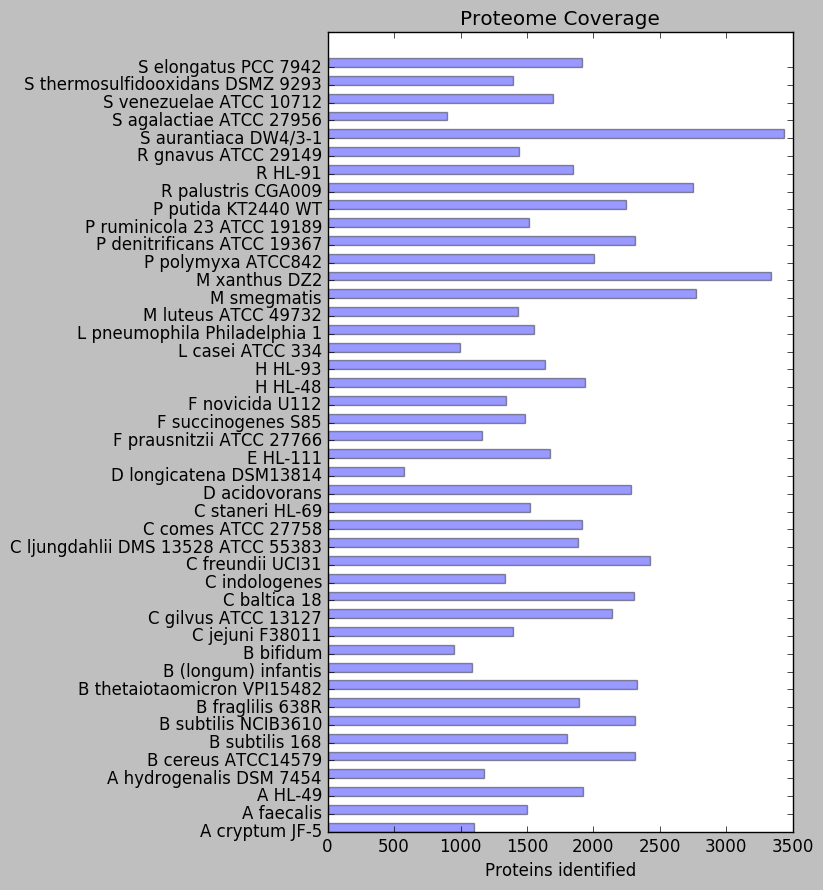

In [7]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt #not sure why the demo has me importing this twice. That should be commented

#make two sorted arrays for the organisms and their data
#SortedOrdList is alreay an array, but need a shorter names for the plot. let's first try g. species
OrgNameForLabel = []
for Org in SortedOrgList:
    Bits = Org.split(" ")
    print (Bits)
    Genus = Bits[0]
    Species = Bits[1] # some things have a strain that I don't want maybe
    #still have to figure out how to have it more uniform, because I have some data with strains, like two b. subtillis strains
    GenusLetter = Genus[0]
    OrgNameForLabel.append( Org.replace(Genus, GenusLetter))


plt.figure(figsize=(6,10), dpi=80)
    
y_pos = np.arange(len(SortedOrgList))
plt.barh(y_pos, SortedProteinCountList, alpha=0.4, height=0.5)
plt.yticks(y_pos, OrgNameForLabel)
plt.xlabel('Proteins identified')
plt.title("Proteome Coverage")

plt.show()
